In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,5
from scipy.integrate import solve_ivp
import scipy.interpolate

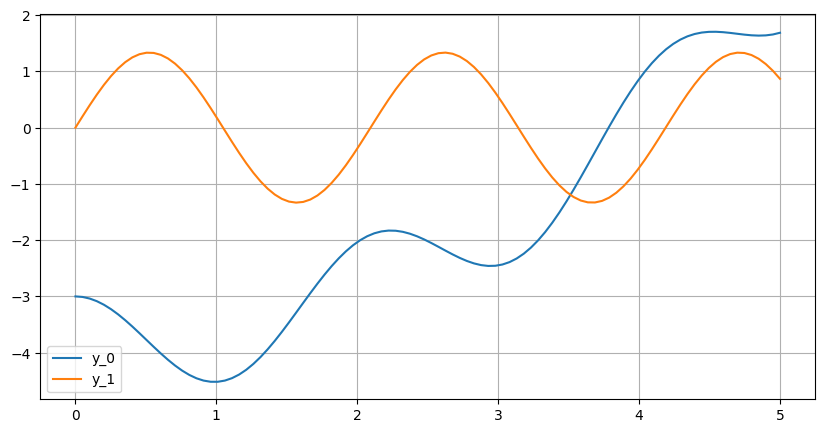

In [2]:
#TEST FUNCTION: dy_0/dt = 4cos(3t) and dy_1/dt = -2y_0 + 0.5t

#Define derivative function
def f_test(t, y, c):

    dydt = [c[0]*np.cos(c[1]*t), c[2]*y[0]+c[3]*t]

    return dydt

#Define time spans, initial values, and constants
tspan = np.linspace(0, 5, 100)
yinit = [0, -3]
c = [4, 3, -2, 0.5]


#Solve differential equation
sol = solve_ivp(lambda t, y: f_test(t, y, c), 
            [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

#Plot states
plt.plot(tspan, sol.y[1], label='y_0')
plt.plot(tspan, sol.y[0], label='y_1')

plt.grid()
plt.legend()

In [21]:
# Used functions

### no drugs
def f(t, x):
    # assign each ODE to a vector element
    #alive
    A = c[0]*x[0]*(1 - (x[0] / c[1])) - c[2]*x[0]*x[1] 
    #dead
    D = c[2]*x[0]*x[1] - c[5]*x[1] 
    
    dxdt = [A, D]
    return dxdt

### with drugs
def f_cyt(t, x, i):
    # assign each ODE to a vector element
    #alive
    A = c[0]*x[0]*(1 - (x[0] / c[1])) - c[2]*x[0]*x[1] - ((muAC[i]*x[0]*x[2]) / (c[3] + x[2]))
    #dead
    D = c[2]*x[0]*x[1] - c[5]*x[1] + ((muAC[i]*x[0]*x[2]) / (c[3] + x[2]))
    #drug
    C = -c[4]*x[2] - ((muCA[i]*x[2]*x[0]) / (c[3] + x[2]))
    
    dxdt = [A, D, C]
    return dxdt

def f_gem(t, x):
    # assign each ODE to a vector element
    #alive
    A = c[0]*x[0]*(1 - (x[0] / c[1])) - c[2]*x[0]*x[1]  - ((muAC*x[0]*x[2]) / (c[3] + x[2]))
    #dead
    D = c[2]*x[0]*x[1] - c[5]*x[1] + ((muAC*x[0]*x[2]) / (c[3] + x[2]))
    #drug
    C = -c[4]*x[2] - ((muCA*x[2]*x[0]) / (c[3] + x[2]))
    
    dxdt = [A, D, C]
    return dxdt

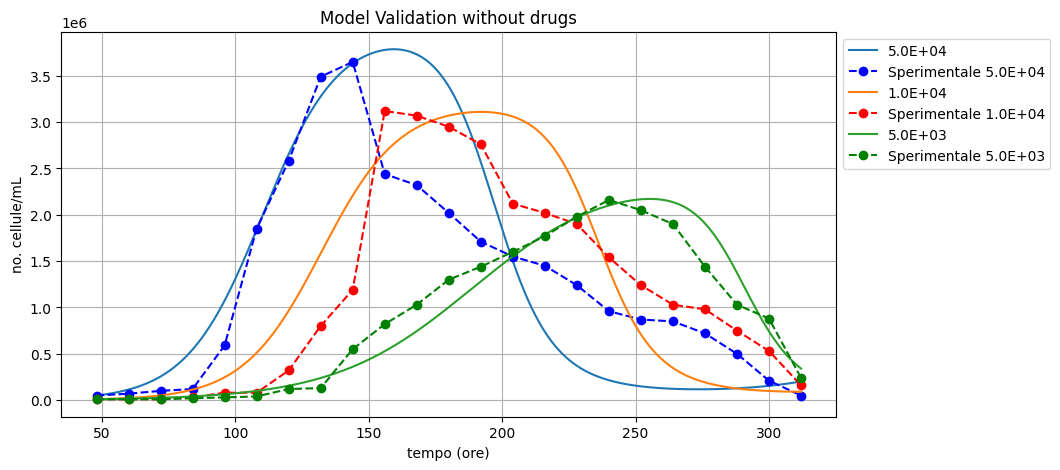

In [4]:
# constants
c = [0, 4e6, 3.7e-8, 2e3, 0.231, 0.017]
#    r   K    muA     a    muC     d
#    0   1     2      3     4      5

t = np.linspace(48, 312, 23000)

# experimental values
# todo: improve it by putting the values in a file (csv or txt or whatever) and access
# it with pandas
t_exp = [48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 
         192, 204, 216, 228, 240, 252, 264, 276, 288, 300, 312]
val_exp = [[5e4, 7e4, 1e5, 1.2e5, 5.9e5, 1.85e6, 2.58e6, 3.49e6, 
           3.65e6, 2.44e6, 2.32e6, 2.02e6, 1.71e6, 1.55e6, 1.45e6, 
           1.24e6, 9.6e5, 8.7e5, 8.5e5, 7.2e5, 5e5, 2.1e5, 5e4],
          [1e4, 1e4, 1e4, 3e4, 8e4, 8e4, 32e4, 80e4, 119e4, 312e4, 307e4, 295e4, 276e4, 212e4, 202e4, 190e4, 154e4,
          124e4, 103e4, 98e4, 75e4, 53e4, 16e4],
          [1e4, 1e4, 1e4, 2e4, 3e4, 4e4, 12e4, 13e4, 55e4, 82e4, 103e4, 130e4, 144e4, 160e4, 177e4, 198e4, 216e4,
          205e4, 190e4, 144e4, 103e4, 88e4, 24e4]]
val_guzev = [[54054, 122897, 273025, 577722, 1114930, 1862730, 2621770, 3180420, 3498490, 3641320, 3654730, 3500150, 
             1062170, 2364930, 1672210, 1149160, 779597, 551455, 388608, 276498, 198206, 142884, 103435],
            [10070, 22602, 50236, 109941, 234397, 477462, 900296, 1509560, 2184030, 2732350, 3052090,
            3162600, 3125520, 2990300, 2785060, 2523550, 2212900, 1859650, 1474810, 1078450, 702772, 388800, 171158],
            [5228, 8821, 14854, 24948, 41736, 69424, 114512, 186545, 298370, 464737, 697464, 996212, 1338190, 1676040,
            1951030, 2114600, 2141610, 2029460, 1791020, 1451290, 1050550, 648799, 318579]]

A0 = [5e4, 1e4, 5e3] 
color = ['bo--', 'ro--', 'go--']
error = [[],[],[]]
error_g = [[],[],[]]
# pk and muA calculated with sensitivity. Documentation does not explicit the used values
pk = [1, 0.8, 0.6] # K multiplier for each initial condition
pmuA = [0.8, 1, 1.4] # muA multiplier for each initial condition

for i in range(3):
    # initial conditions
    x0 = [val_exp[i][0], 0.05*val_exp[i][0]]
    c[0] = np.log(val_exp[i][7]/val_exp[i][3])/48
    c[1] = 4e6*pk[i]
    c[2] = 3.7e-8*pmuA[i]
    
    sol = solve_ivp(lambda t, x: f(t, x), 
                    [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                    rtol = 2.3e-14, max_step = 0.9)
    # NB: rtol sometimes has different values. Does not matter in our case. Refer to docs
    
    for j in range (len(t_exp)):
        #SIMULATION ERROR
        error[i].append((np.absolute(val_exp[i][j] - sol.y[0][j*1045]) / sol.y[0][j*1045]) * 100)
        #GUZEV ERROR
        error_g[i].append((np.absolute(val_guzev[i][j] - sol.y[0][j*1045]) / sol.y[0][j*1045]) * 100)
        
    # plot the results
    plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(A0[i]))
    plt.plot(t_exp, val_exp[i], color[i], label = 'Sperimentale {:.1E}'.format(A0[i]))
    plt.xlabel("tempo (ore)")
    plt.ylabel("no. cellule/mL")
    
plt.title("Model Validation without drugs")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")   
plt.grid()
plt.show()

Errore medio sperimentale: 132.701 %
Errore medio Guzev: 65.076 %


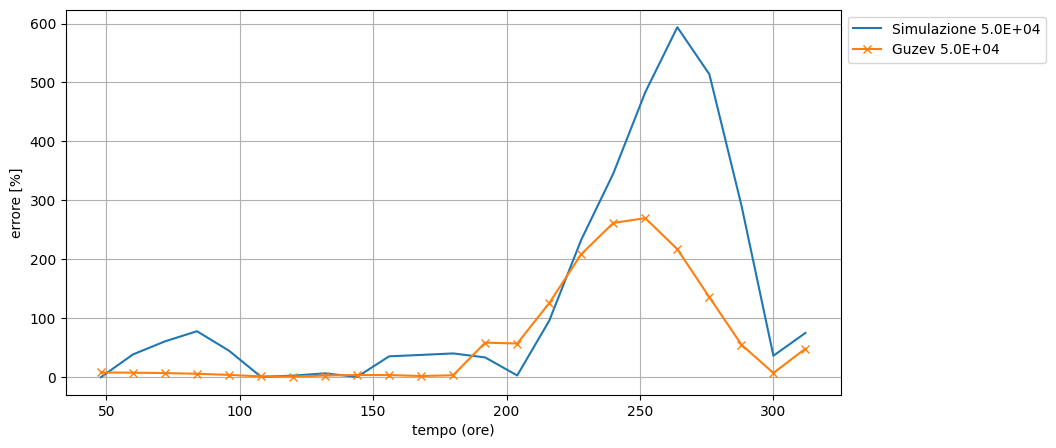

In [5]:
plt.plot(t_exp, error[0], label = 'Simulazione {:.1E}'.format(A0[0]))
plt.plot(t_exp, error_g[0], marker = 'x', label = 'Guzev {:.1E}'.format(A0[0]))
    
print (f"Errore medio sperimentale: {round(np.average(error[0]), 3)} %")
print (f"Errore medio Guzev: {round(np.average(error_g[0]), 3)} %")
    
plt.xlabel("tempo (ore)")
plt.ylabel("errore [%]")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")  
plt.grid()

Errore medio sperimentale: 101.321 %
Errore medio Guzev: 82.274 %


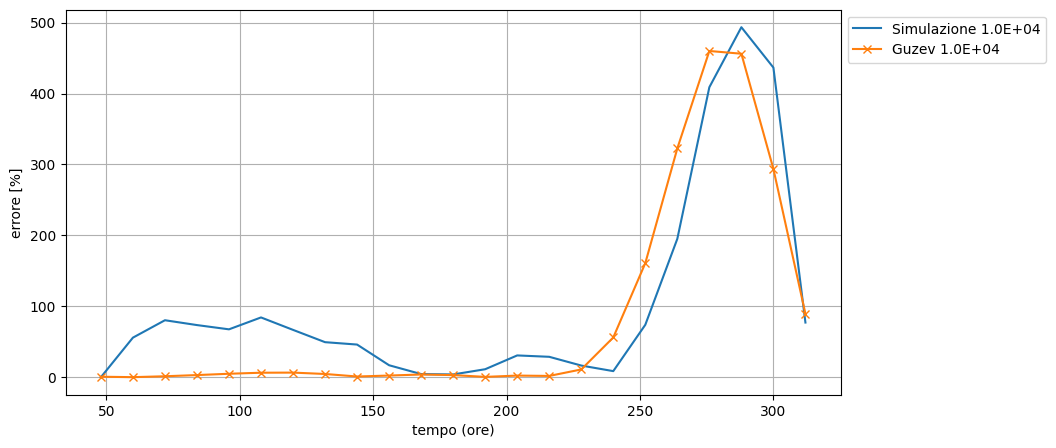

In [6]:
plt.plot(t_exp, error[1], label = 'Simulazione {:.1E}'.format(A0[1]))
plt.plot(t_exp, error_g[1], marker = 'x', label = 'Guzev {:.1E}'.format(A0[1]))
    
print (f"Errore medio sperimentale: {round(np.average(error[1]), 3)} %")
print (f"Errore medio Guzev: {round(np.average(error_g[1]), 3)} %")
    
plt.xlabel("tempo (ore)")
plt.ylabel("errore [%]")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")  
plt.grid()

Errore medio sperimentale: 27.814 %
Errore medio Guzev: 19.202 %


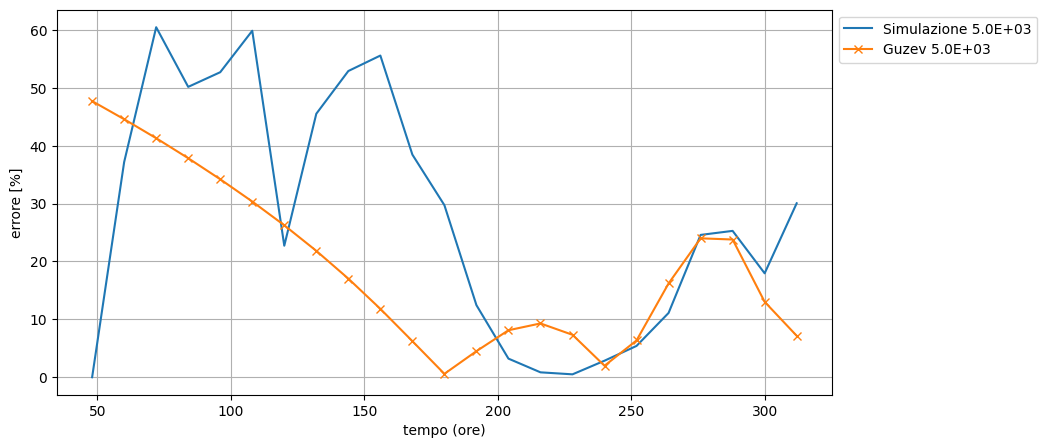

In [7]:
plt.plot(t_exp, error[2], label = 'Simulazione {:.1E}'.format(A0[2]))
plt.plot(t_exp, error_g[2], marker = 'x', label = 'Guzev {:.1E}'.format(A0[2]))
    
print (f"Errore medio sperimentale: {round(np.average(error[2]), 3)} %")
print (f"Errore medio Guzev: {round(np.average(error_g[2]), 3)} %")
    
plt.xlabel("tempo (ore)")
plt.ylabel("errore [%]")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")  
plt.grid()

In [8]:
# interpolation in order to find concentrations at 84h and 132h 
# for different initial conditions
x_interpolazione = [5e3, 1e4, 5e4] 

y_interpolazione84 = [val_exp[2][3], val_exp[1][3], val_exp[0][3]]
y_interpolazione132 = [val_exp[2][7], val_exp[1][7], val_exp[0][7]]

y_interpolato84 = scipy.interpolate.interp1d(x_interpolazione, y_interpolazione84)
y_interpolato132 = scipy.interpolate.interp1d(x_interpolazione, y_interpolazione132)

# Analisi di sensitività su dati di letteratura

## 1. Cellule vive iniziali

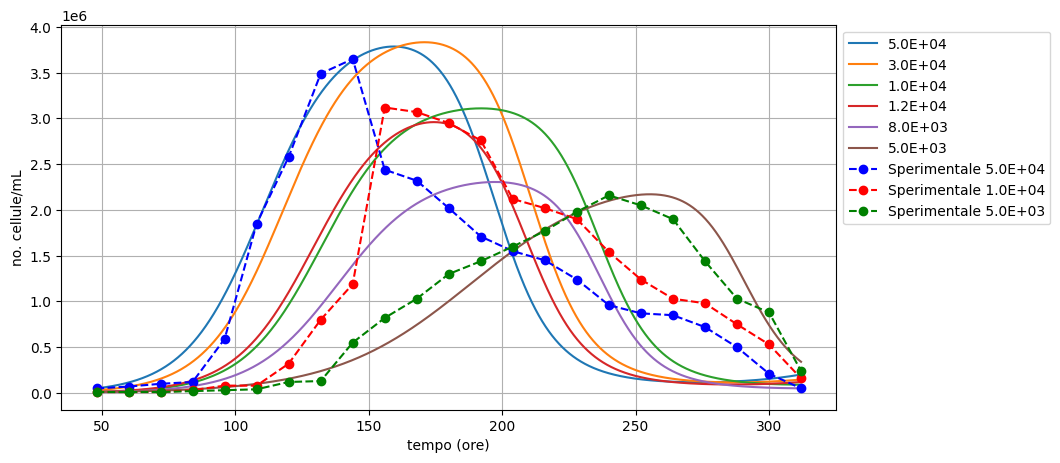

In [9]:
# todo: improve the code with a for. This is not an elegant implementation

c[1] = 4e6*pk[0]
c[2] = 3.7e-8*pmuA[0]
    
x0 = [val_exp[1][0]*5, 0.05*5*val_exp[1][0]]
c[0] = np.log(y_interpolato132(x0[0])/y_interpolato84(x0[0]))/48

sol = solve_ivp(lambda t, x: f(t, x), 
        [t[0], t[-1]], x0, method = "RK45", t_eval = t,
        rtol = 2.220446049250313e-14, max_step = 1)
plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(x0[0]))

x0 = [val_exp[1][0]*3, 0.05*3*val_exp[1][0]]
c[0] = np.log(y_interpolato132(x0[0])/y_interpolato84(x0[0]))/48
sol = solve_ivp(lambda t, x: f(t, x), 
        [t[0], t[-1]], x0, method = "RK45", t_eval = t,
        rtol = 2.220446049250313e-14, max_step = 1)
plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(x0[0]))

c[1] = 4e6*pk[1]
c[2] = 3.7e-8*pmuA[1]

x0 = [val_exp[1][0], 0.05*val_exp[1][0]]
c[0] = np.log(y_interpolato132(x0[0])/y_interpolato84(x0[0]))/48

sol = solve_ivp(lambda t, x: f(t, x), 
        [t[0], t[-1]], x0, method = "RK45", t_eval = t,
        rtol = 2.220446049250313e-14, max_step = 1)
plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(x0[0]))

x0 = [val_exp[1][0]*1.2, 11.2*0.05*val_exp[1][0]]
c[0] = np.log(y_interpolato132(x0[0])/y_interpolato84(x0[0]))/48
sol = solve_ivp(lambda t, x: f(t, x), 
        [t[0], t[-1]], x0, method = "RK45", t_eval = t,
        rtol = 2.220446049250313e-14, max_step = 1)
plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(x0[0]))

c[1] = 4e6*pk[2]
c[2] = 3.7e-8*pmuA[2]

x0 = [val_exp[1][0]*0.8, 0.05*0.8*val_exp[1][0]]
c[0] = np.log(y_interpolato132(x0[0])/y_interpolato84(x0[0]))/48
sol = solve_ivp(lambda t, x: f(t, x), 
        [t[0], t[-1]], x0, method = "RK45", t_eval = t,
        rtol = 2.220446049250313e-14, max_step = 1)
plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(x0[0]))

x0 = [val_exp[2][0], 0.05*val_exp[2][0]]
c_int = np.log(y_interpolato132(x0[0])/y_interpolato84(x0[0]))/48

c[0] = np.log(val_exp[2][7]/val_exp[2][3])/48
c[1] = 4e6*pk[i]
c[2] = 3.7e-8*pmuA[i]
sol = solve_ivp(lambda t, x: f(t, x), 
        [t[0], t[-1]], x0, method = "RK45", t_eval = t,
        rtol = 2.220446049250313e-14, max_step = 0.9)
plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(A0[2]))

plt.plot(t_exp, val_exp[0], color[0], label = 'Sperimentale {:.1E}'.format(A0[0]))
plt.plot(t_exp, val_exp[1], color[1], label = 'Sperimentale {:.1E}'.format(A0[1]))
plt.plot(t_exp, val_exp[2], color[2], label = 'Sperimentale {:.1E}'.format(A0[2]))

plt.xlabel("tempo (ore)")
plt.ylabel("no. cellule/mL")
    
plt.legend(bbox_to_anchor=(1,1), loc="upper left")  
plt.grid()

plt.show()

## 2. Tasso di crescita

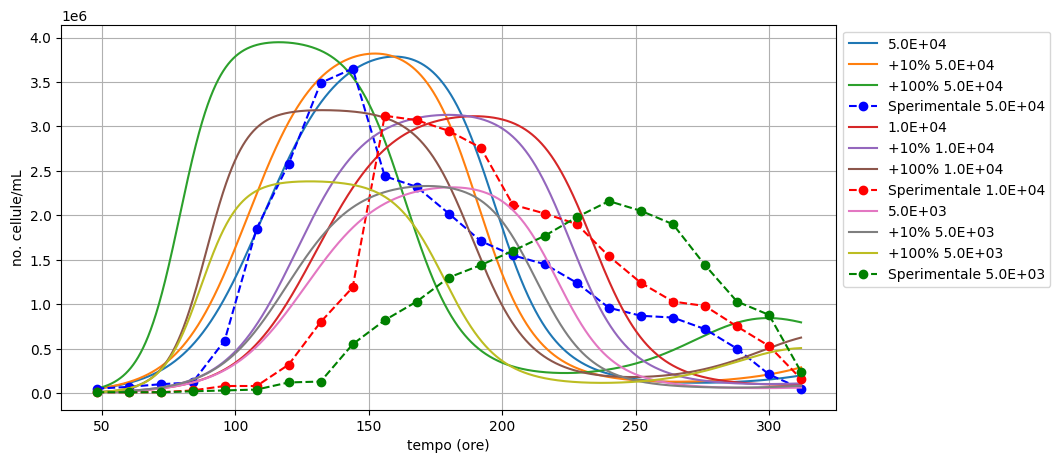

In [10]:
# todo: improve implementation by dynamically declaring the parameter 
# which needs to be modified
for i in range(3):
    x0 = [val_exp[i][0], 0.05*val_exp[i][0]]
    c[1] = 4e6*pk[i]
    c[2] = 3.7e-8*pmuA[i]
    
    c[0] = 0.07
    sol = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)
    
    c[0] = 0.077
    sol1 = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)
    
    c[0] = 0.14
    sol2 = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)

    # plot the results
    plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(A0[i]))
    plt.plot(sol.t, sol1.y[0], label = '+10% {:.1E}'.format(A0[i]))
    plt.plot(sol.t, sol2.y[0], label = '+100% {:.1E}'.format(A0[i]))
    plt.plot(t_exp, val_exp[i], color[i], label = 'Sperimentale {:.1E}'.format(A0[i]))
    plt.xlabel("tempo (ore)")
    plt.ylabel("no. cellule/mL")
    
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()

plt.show()

## 3. Limite di crescita

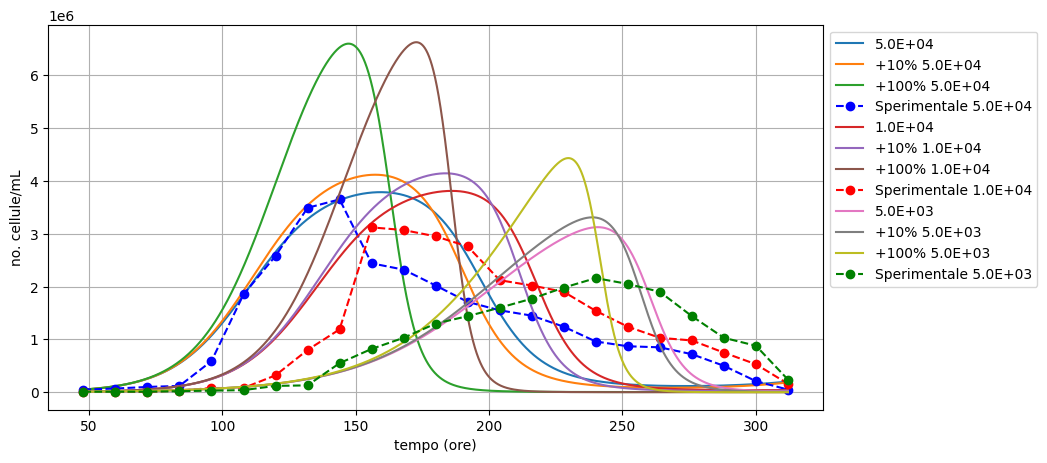

In [11]:
for i in range(3):
    x0 = [val_exp[i][0], 0.05*val_exp[i][0]]
    
    c[0] = np.log(val_exp[i][7]/val_exp[i][3])/48
    c[2] = 3.7e-8*pmuA[i]
    
    c[1] = 4e6
    sol = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)
    
    c[1] = 4.4e6
    sol1 = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)
    
    c[1] = 8e6
    sol2 = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)

    # plot the results
    plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(A0[i]))
    plt.plot(sol.t, sol1.y[0], label = '+10% {:.1E}'.format(A0[i]))
    plt.plot(sol.t, sol2.y[0], label = '+100% {:.1E}'.format(A0[i]))
    plt.plot(t_exp, val_exp[i], color[i], label = 'Sperimentale {:.1E}'.format(A0[i]))
    plt.xlabel("tempo (ore)")
    plt.ylabel("no. cellule/mL")

plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()

plt.show()

## 4. Tasso di morte

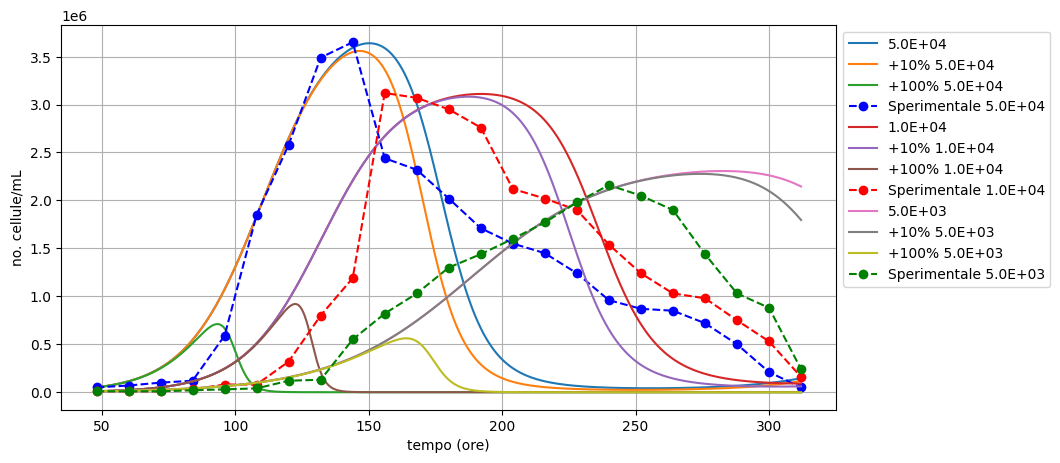

In [12]:
for i in range(3):
    x0 = [val_exp[i][0], 0.05*val_exp[i][0]]
    c[0] = np.log(val_exp[i][7]/val_exp[i][3])/48
    c[1] = 4e6*pk[i]
    
    c[2] = 3.7e-8
    sol = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)
    
    c[2] = 4.07e-8
    sol1 = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)
    
    c[2] = 3.7e-7
    sol2 = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)

    # plot the results
    plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(A0[i]))
    plt.plot(sol.t, sol1.y[0], label = '+10% {:.1E}'.format(A0[i]))
    plt.plot(sol.t, sol2.y[0], label = '+100% {:.1E}'.format(A0[i]))
    plt.plot(t_exp, val_exp[i], color[i], label = 'Sperimentale {:.1E}'.format(A0[i]))
    plt.xlabel("tempo (ore)")
    plt.ylabel("no. cellule/mL")
    
plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.grid()

plt.show()

## 5. Tasso di smaltimento

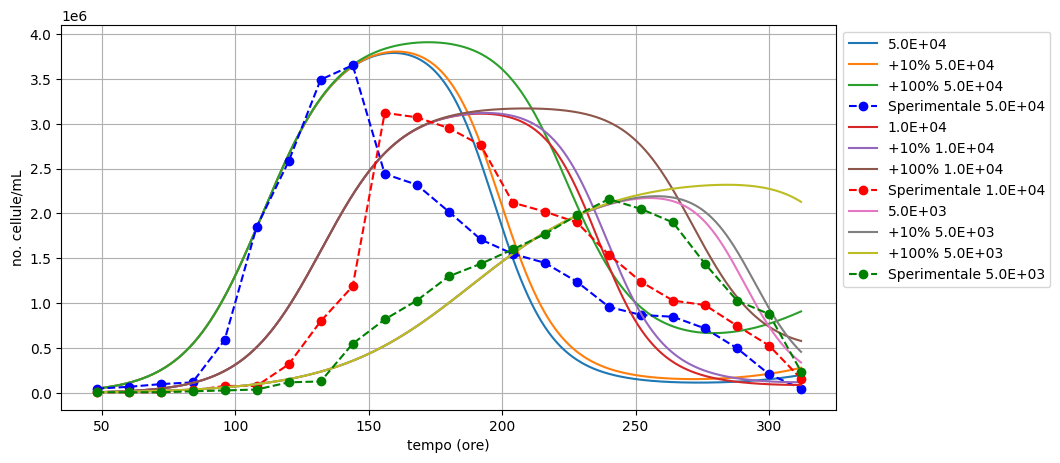

In [13]:
for i in range(3):
    x0 = [val_exp[i][0], 0.05*val_exp[i][0]]
    c[0] = np.log(val_exp[i][7]/val_exp[i][3])/48
    c[1] = 4e6*pk[i]
    c[2] = 3.7e-8*pmuA[i]
    
    c[5] = 0.017
    sol = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)
    
    c[5] = 0.0187
    sol1 = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)
    
    c[5] = 0.034
    sol2 = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 2.220446049250313e-14, max_step = 1)

    # plot the results
    plt.plot(sol.t, sol.y[0], label = '{:.1E}'.format(A0[i]))
    plt.plot(sol.t, sol1.y[0], label = '+10% {:.1E}'.format(A0[i]))
    plt.plot(sol.t, sol2.y[0], label = '+100% {:.1E}'.format(A0[i]))
    plt.plot(t_exp, val_exp[i], color[i], label = 'Sperimentale {:.1E}'.format(A0[i]))
    plt.xlabel("tempo (ore)")
    plt.ylabel("no. cellule/mL")
    
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.grid()

plt.show()

## 6. TEST CON CITARABINA (NON FUNZIONA PER MANCANZA DI PARAMETRI)

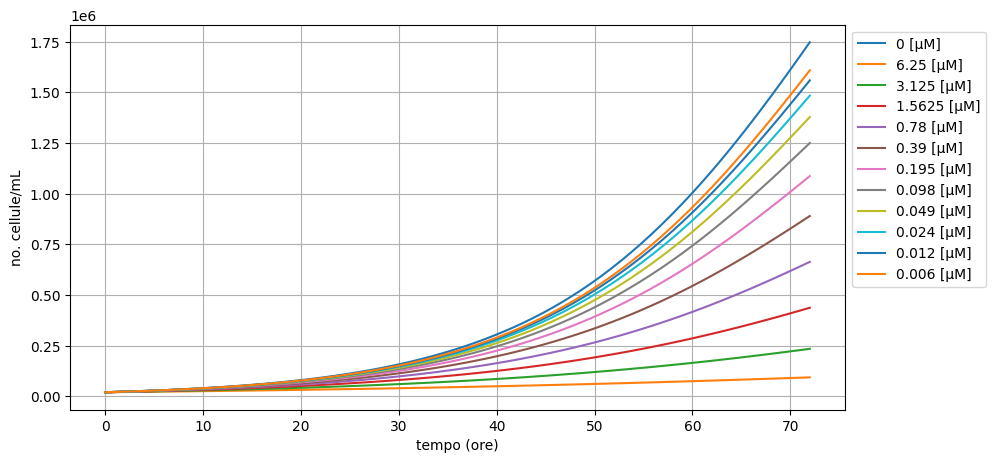

In [22]:
# constants
c = [0.07, 4e6, 3.7e-8, 2e3, 0.231, 0.017]
#     r     K    muA     a    muC     d
#     0     1     2      3     4      5

muAC = [0, 0.046, 0.0322, 0.0225, 0.0158, 0.011, 0.0077, 0.0054, 0.0038, 0.0026,
            0.0018, 0.0013] 
muCA = [0, 0.46, 0.322, 0.225, 0.158, 0.11, 0.077, 0.054, 0.038, 0.026, 0.018, 0.013]
dose = [0, 6.25, 3.125, 1.5625, 0.78, 0.39, 0.195, 0.098, 0.049, 0.024, 0.012, 0.006]
# declare a time vector (time window)
t = np.linspace(0, 72, 72)
    
#error
error = []
sol_guzev = [1646260, 85683, 168014, 291671, 452951, 637807, 827114, 1003650,
            1156420, 1281250, 1378920, 1452970]
for i in range(len(muAC)):
    # initial conditions
    x0 = [2e4, 0.05*2e4, dose[i]*6e14]

    sol = solve_ivp(lambda t, x: f_cyt(t, x, i), 
                    [t[0], t[-1]], x0, method = "RK45", t_eval = t)
    error.append((np.absolute(sol.y[0][71] - sol_guzev[i]) / sol_guzev[i]) * 100) 
    
    # plot the results
    l = str(dose[i]) + " [μM]"
    plt.plot(sol.t, sol.y[0], label = l)
    plt.xlabel("tempo (ore)")
    plt.ylabel("no. cellule/mL")
    
#plt.title ("Alive with drugs over time")
plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.grid()
plt.show()

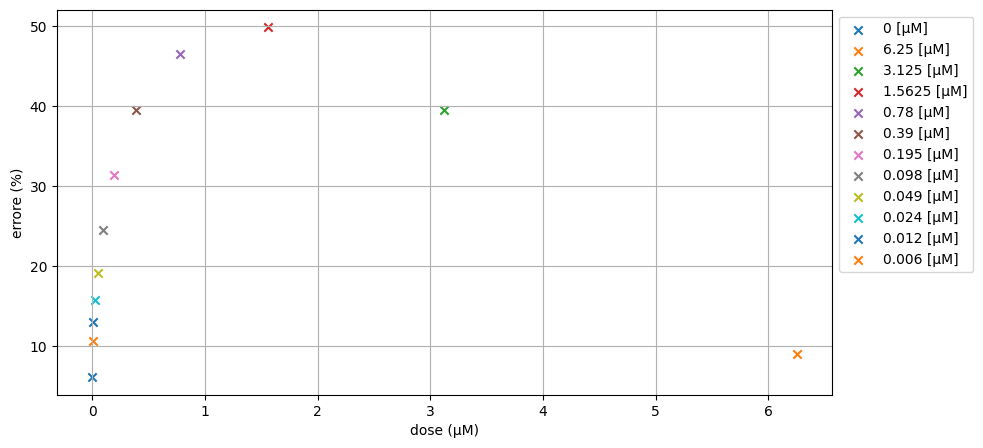

Errore medio: 25.434 %


In [23]:
for i in range(len(dose)):  
    l = str(dose[i]) + " [μM]"
    plt.scatter(dose[i], error[i], marker = 'x', label = l)
    
plt.xlabel("dose (μM)")
plt.ylabel("errore (%)")    
plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.grid()
plt.show()
print (f"Errore medio: {round(np.average(error), 3)} %")

# Analisi di sensitività con dati sperimentali Humanitas

## 1. No farmaco

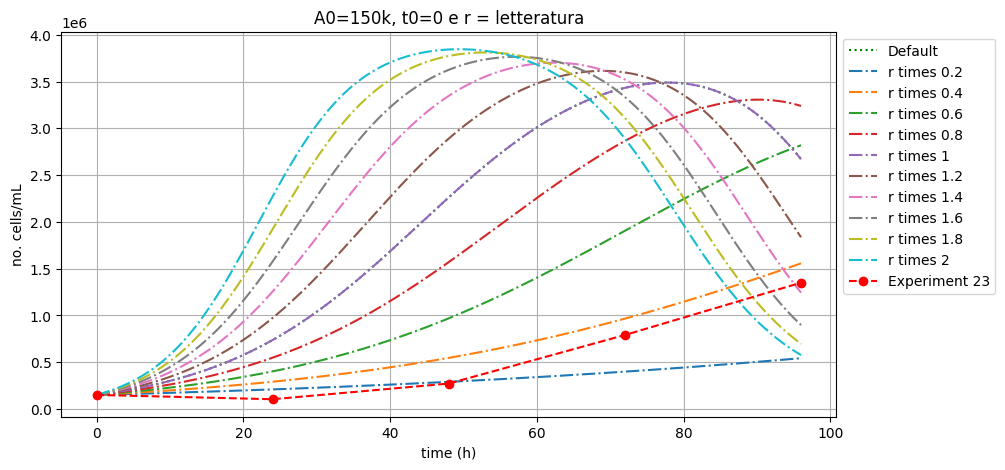

In [16]:
c = [0.073491512, 4e6, 3.7e-8, 2.438e-3, 0.4423, 0.017]
#     r            K    muA         a     muC   d
#     0            1     2          3      4    5
p = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
# declare a time vector (time window)
t = np.linspace(0, 96, 1000000)
# experimental values
t_exp = [0, 24, 48, 72, 96]
val_exp23 = [150000, 104111, 271645, 790480, 1349715]

x0 = [150000, 6544]
color = ['bo--', 'ro--', 'g:']

sol = solve_ivp(lambda t, x: f(t, x), 
                    [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                    rtol = 2.220446049250313e-14, max_step = 0.9)
plt.plot(sol.t, sol.y[0], color[2], label = 'Default')

for i in range(len(p)):
    c[0] = p[i]*0.073491512
    sol = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 3e-14, max_step = 2)
    # plot the results
    lb = 'r times ' + str(p[i])
    plt.plot(sol.t, sol.y[0], '-.', label = lb)
plt.plot(t_exp, val_exp23, color[1], label = 'Experiment 23')
plt.xlabel("time (h)")
plt.ylabel("no. cells/mL")
    
plt.title("A0=150k, t0=0 e r = letteratura")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()

plt.show()

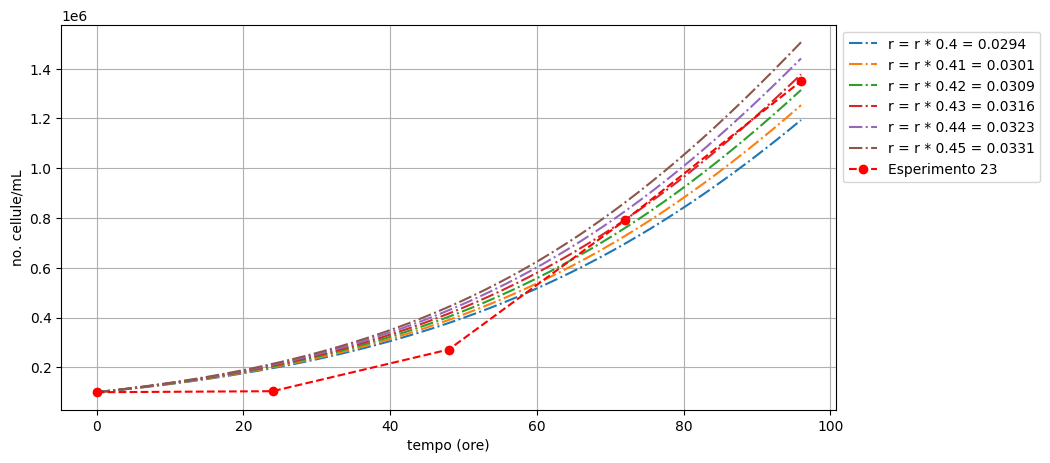

In [17]:
c = [0.073491512, 4e6, 3.7e-8, 2.438e-3, 0.4423, 0.017]
#     r            K    muA         a     muC   d
#     0            1     2          3      4    5
p = [0.40, 0.41, 0.42, 0.43, 0.44, 0.45]
# declare a time vector (time window)
t = np.linspace(0, 96, 1000000)
# experimental values
t_exp = [0, 24, 48, 72, 96]
val_exp23 = [100000, 104111, 271645, 790480, 1349715]

x0 = [100000, 4362]
color = ['bo--', 'ro--', 'g:']
error = [[],[],[],[],[],[]]
for i in range(len(p)):
    c[0] = p[i]*0.073491512
    sol = solve_ivp(lambda t, x: f(t, x), 
                [t[0], t[-1]], x0, method = "RK45", t_eval = t,
                rtol = 3e-14, max_step = 2)
    error[i].append((np.absolute(sol.y[0][0] - val_exp23[0]) / val_exp23[0]) * 100) 
    error[i].append((np.absolute(sol.y[0][24*10416] - val_exp23[1]) / val_exp23[1]) * 100)
    error[i].append((np.absolute(sol.y[0][48*10416] - val_exp23[2]) / val_exp23[2]) * 100)
    error[i].append((np.absolute(sol.y[0][72*10416] - val_exp23[3]) / val_exp23[3]) * 100)
    error[i].append((np.absolute(sol.y[0][96*10416] - val_exp23[4]) / val_exp23[4]) * 100)
    # plot the results
    lb = 'r = r * '+str(p[i])+' = '+str(round(c[0], 4))
    plt.plot(sol.t, sol.y[0], '-.', label = lb)
plt.plot(t_exp, val_exp23, color[1], label = 'Esperimento 23')
plt.xlabel("tempo (ore)")
plt.ylabel("no. cellule/mL")
   
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.show()

Errore medio: 30.342 %
Errore medio: 30.217 %
Errore medio: 30.079 %
Errore medio: 30.842 %
Errore medio: 34.304 %
Errore medio: 37.85 %


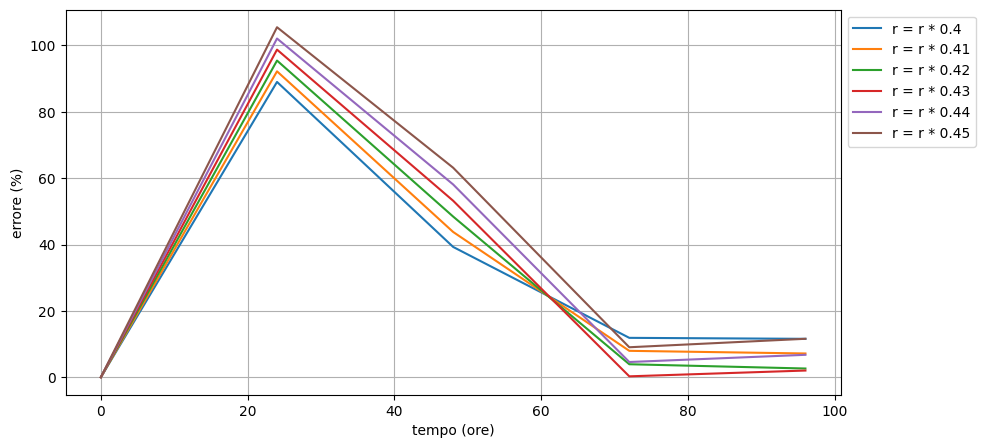

In [18]:
for i in range(len(p)):
    lb = 'r = r * '+str(p[i])
    plt.plot(t_exp, error[i], label = lb)
    print (f"Errore medio: {round(np.average(error[i]), 3)} %")
plt.xlabel("tempo (ore)")
plt.ylabel("errore (%)")    

plt.legend(bbox_to_anchor=(1,1), loc="upper left")  
plt.grid()
plt.show()

## 2. Con Gemcitabina

### 2.1 10ng/ml

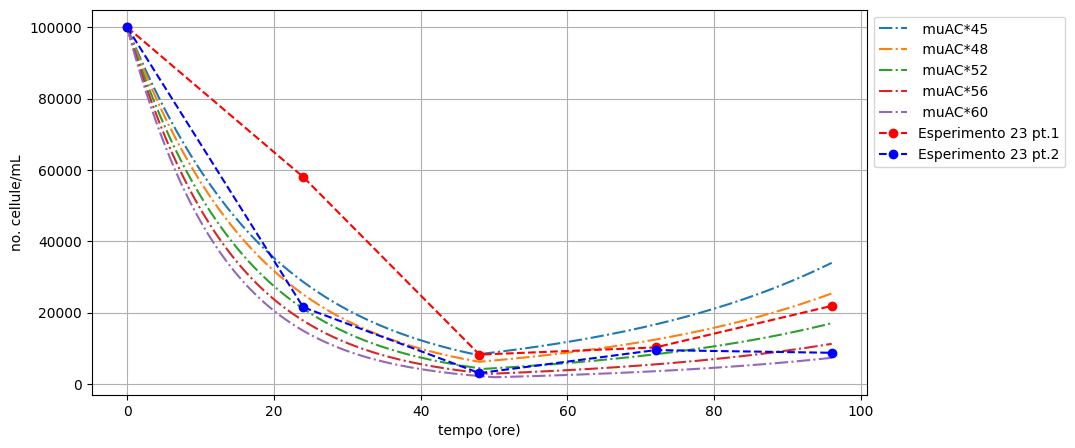

In [24]:
c = [0.073491512, 4e6, 3.7e-8, 0.002438, 0.4423, 0.017]
#     r            K    muA         a     muC     d
#     0            1     2          3      4      5
muAC = 0.0018 # data from docs with dose=0.012
muCA = 0.018 
dose = 0.038

pmuAC = [45, 48, 52, 56, 60]
# declare a time vector (time window)
t = np.linspace(0, 96, 1000000)
# experimental values
t_exp = [0, 24, 48, 72, 96]
val_exp23 = [100000, 58000, 8213, 10227, 21867]
val_exp2 =  [100000, 21487, 3033, 9480, 8727]

x0 = [100000, 4362, dose*6e14]
color = ['bo--', 'ro--', 'g:']

error = [[],[],[],[],[],[]]

c[0] = 0.43*0.073491512
for j in range(len(pmuAC)):
    muAC = 0.0018*pmuAC[j]
    muCA = muAC*10
    sol = solve_ivp(lambda t, x: f_gem(t, x), 
                [t[0], t[-1]], x0, method = "BDF", t_eval = t, # BDF or else no convergence
                rtol = 3e-14)
    lb = ' muAC*'+str(pmuAC[j])
    plt.plot(sol.t, sol.y[0], '-.', label = lb)
plt.plot(t_exp, val_exp23, color[1], label = 'Esperimento 23 pt.1')
plt.plot(t_exp, val_exp2, color[0], label = 'Esperimento 23 pt.2')
plt.xlabel("tempo (ore)")
plt.ylabel("no. cellule/mL")
    
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.show()

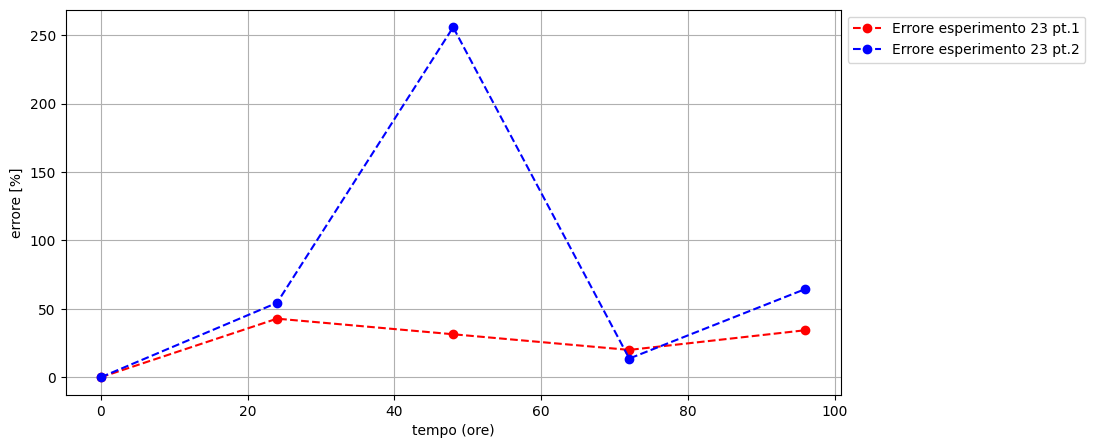

e_max =  255.82001818452
e_min =  19.961526269245986
e_med23 =  25.705787642721265
e_med2 =  77.66631983318723
muAC =  0.0864


In [26]:
# todo: improve error calculation by reusing data from the upper block and not recalculating it
c = [0.073491512, 4e6, 3.7e-8, 0.002438, 0.4423, 0.017]
#     r            K    muA         a     muC     d
#     0            1     2          3      4      5
c[0] = 0.43*0.073491512
muAC = 0.0018*48
muCA = muAC*10
error23 = []
error2 = []
t = np.linspace(0, 96, 1000)

sol = solve_ivp(lambda t, x: f_gem(t, x), 
                [t[0], t[-1]], x0, method = "BDF", t_eval = t,
                rtol = 3e-14)

for i in range(len(t_exp)):
    error23.append((np.absolute(sol.y[0][i*200] - val_exp23[i])/val_exp23[i])*100)
    error2.append((np.absolute(sol.y[0][i*200] - val_exp2[i])/val_exp2[i])*100)

plt.plot(t_exp, error23, color[1], label = 'Errore esperimento 23 pt.1')
plt.plot(t_exp, error2, color[0], label = 'Errore esperimento 23 pt.2')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.xlabel("tempo (ore)")
plt.ylabel("errore [%]")
plt.show()
print("e_max = ",np.max(error2))
print("e_min = ",error23[3])
print("e_med23 = ",np.average(error23))
print("e_med2 = ",np.average(error2))
print("muAC = ",muAC)

### 2.2 5ng/ml

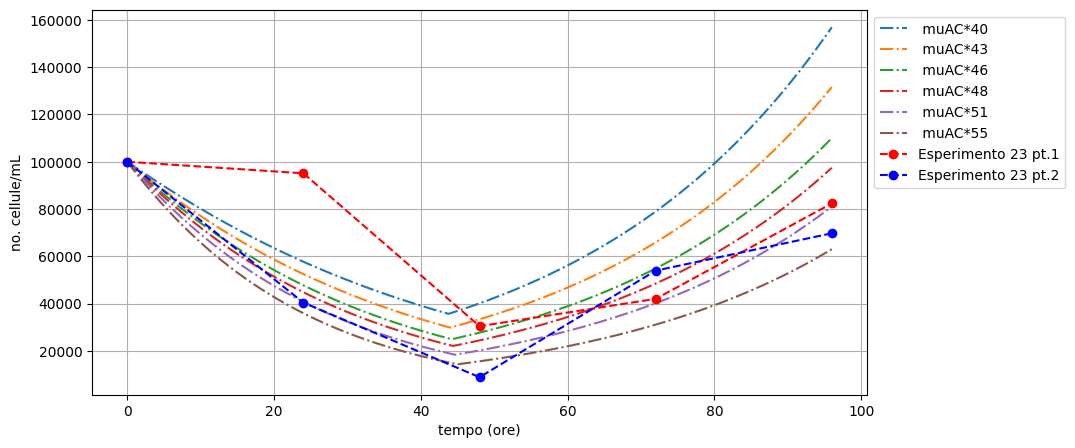

In [28]:
c = [0.073491512, 4e6, 3.7e-8, 0.002438, 0.4423, 0.017]
#     r            K    muA         a     muC     d
#     0            1     2          3      4      5
muAC = 0.0013
muCA = 0.013 
dose = 0.019

pmuAC = [40, 43, 46, 48, 51, 55]
# declare a time vector (time window)
t = np.linspace(0, 96, 1000)
# experimental values
t_exp = [0, 24, 48, 72, 96]
val_exp23 = [100000, 95120, 30500, 42047, 82393]
val_exp2 =  [100000, 40460, 8933, 53973, 69760]

x0 = [100000, 4362, dose*6e14]
color = ['bo--', 'ro--', 'g:']

c[0] = 0.43*0.073491512

for i in range(len(pmuAC)):
    muAC = 0.0013*pmuAC[i]
    muCA = muAC*10
    sol = solve_ivp(lambda t, x: f_gem(t, x), 
                [t[0], t[-1]], x0, method = "BDF", t_eval = t,
                rtol = 3e-14, max_step = 2)
    # plot the results
    lb = ' muAC*'+str(pmuAC[i])
    plt.plot(sol.t, sol.y[0], '-.', label = lb)
plt.plot(t_exp, val_exp23, color[1], label = 'Esperimento 23 pt.1')
plt.plot(t_exp, val_exp2, color[0], label = 'Esperimento 23 pt.2')
plt.xlabel("tempo (ore)")
plt.ylabel("no. cellule/mL")
    
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.show()

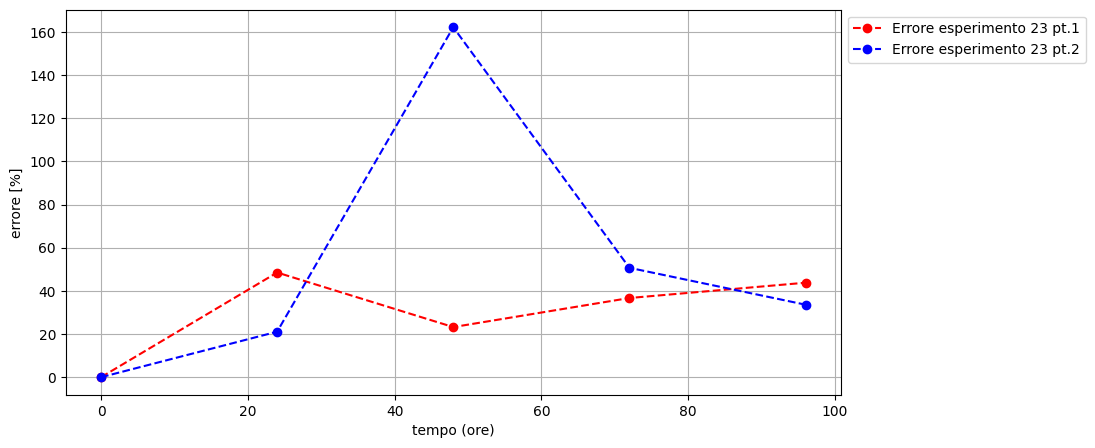

e_max =  162.11452285847298
e_min =  23.230523518205274
e_med23 =  30.43897849450834
e_med2 =  53.49433152511032
muAC =  0.0663


In [29]:
# ERRORE %
c = [0.073491512, 4e6, 3.7e-8, 0.002438, 0.4423, 0.017]
#     r            K    muA         a     muC     d
#     0            1     2          3      4      5
c[0] = 0.43*0.073491512
muAC = 0.0013*51
muCA = muAC*10
error23 = []
error2 = []
t = np.linspace(0, 96, 1000)

sol = solve_ivp(lambda t, x: f_gem(t, x), 
                [t[0], t[-1]], x0, method = "BDF", t_eval = t,
                rtol = 3e-14)

for i in range(len(t_exp)):
    error23.append((np.absolute(sol.y[0][i*200] - val_exp23[i])/val_exp23[i])*100)
    error2.append((np.absolute(sol.y[0][i*200] - val_exp2[i])/val_exp2[i])*100)

plt.plot(t_exp, error23, color[1], label = 'Errore esperimento 23 pt.1')
plt.plot(t_exp, error2, color[0], label = 'Errore esperimento 23 pt.2')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.xlabel("tempo (ore)")
plt.ylabel("errore [%]")
plt.show()
print("e_max = ",np.max(error2))
print("e_min = ",error23[2])
print("e_med23 = ",np.average(error23))
print("e_med2 = ",np.average(error2))
print("muAC = ",muAC)

### 2.3 2ng/ml

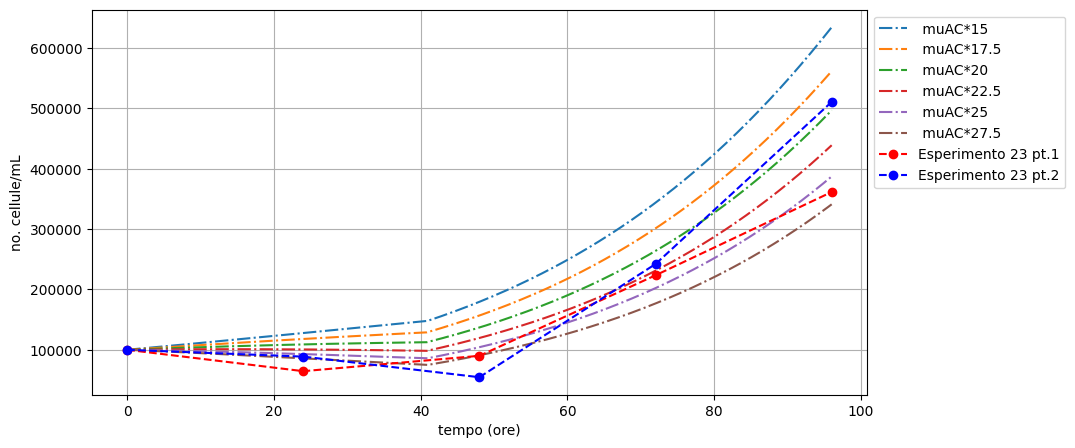

In [30]:
c = [0.073491512, 4e6, 3.7e-8, 0.002438, 0.4423, 0.017]
#     r            K    muA         a     muC     d
#     0            1     2          3      4      5
muAC = 0.0013
muCA = 0.013 
dose = 7.6e-3

pmuAC = [15, 17.5, 20, 22.5, 25, 27.5]
# declare a time vector (time window)
t = np.linspace(0, 96, 1000)
# experimental values
t_exp = [0, 24, 48, 72, 96]
val_exp23 = [100000, 64533, 90000, 223467, 361527]
val_exp2 =  [100000, 88667, 54513, 242133, 510840]

x0 = [100000, 4362, dose*6e14]
color = ['bo--', 'ro--', 'g:']

c[0] = 0.43*0.073491512

for i in range(len(pmuAC)):
    muAC = 0.0013*pmuAC[i]
    muCA = muAC*10
    sol = solve_ivp(lambda t, x: f_gem(t, x), 
                [t[0], t[-1]], x0, method = "BDF", t_eval = t,
                rtol = 3e-14)
    # plot the results
    lb = ' muAC*'+str(pmuAC[i])
    plt.plot(sol.t, sol.y[0], '-.', label = lb)
plt.plot(t_exp, val_exp23, color[1], label = 'Esperimento 23 pt.1')
plt.plot(t_exp, val_exp2, color[0], label = 'Esperimento 23 pt.2')
plt.xlabel("tempo (ore)")
plt.ylabel("no. cellule/mL")
    
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.show()

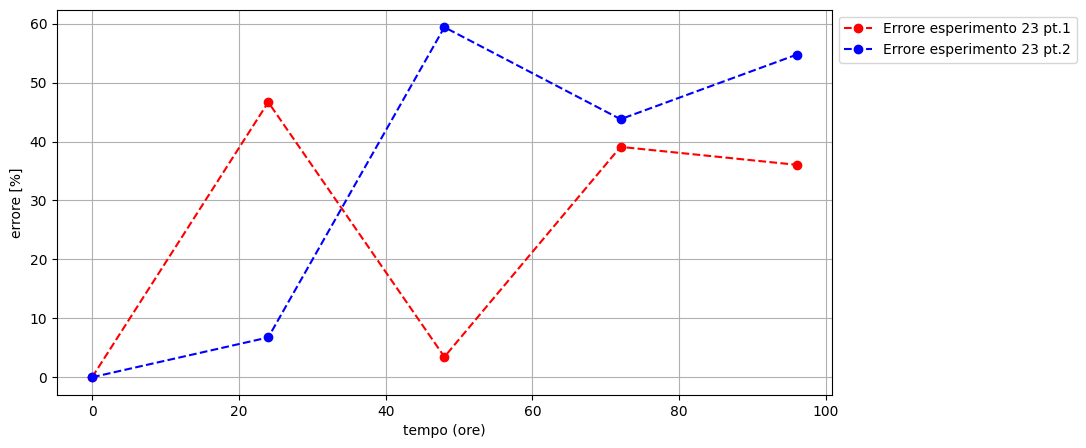

e_max =  59.397975365215906
e_min =  3.452646321288727
e_med23 =  25.053626871803356
e_med2 =  32.93563798227514
muAC =  0.0325


In [31]:
# ERRORE %
c = [0.073491512, 4e6, 3.7e-8, 0.002438, 0.4423, 0.017]
#     r            K    muA         a     muC     d
#     0            1     2          3      4      5
c[0] = 0.43*0.073491512
muAC = 0.0013*25
muCA = muAC*10
error23 = []
error2 = []
t = np.linspace(0, 96, 1000)

sol = solve_ivp(lambda t, x: f_gem(t, x), 
                [t[0], t[-1]], x0, method = "BDF", t_eval = t,
                rtol = 3e-14)

for i in range(len(t_exp)):
    error23.append((np.absolute(sol.y[0][i*200] - val_exp23[i])/val_exp23[i])*100)
    error2.append((np.absolute(sol.y[0][i*200] - val_exp2[i])/val_exp2[i])*100)
    #print(sol.y[0][i*200])
    #print(val_exp23[i])
    #print(val_exp2[i])
    #print("---")

plt.plot(t_exp, error23, color[1], label = 'Errore esperimento 23 pt.1')
plt.plot(t_exp, error2, color[0], label = 'Errore esperimento 23 pt.2')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.xlabel("tempo (ore)")
plt.ylabel("errore [%]")
plt.show()
print("e_max = ",np.max(error2))
print("e_min = ",error23[2])
print("e_med23 = ",np.average(error23))
print("e_med2 = ",np.average(error2))
print("muAC = ",muAC)

### 2.4 0.5ng/ml

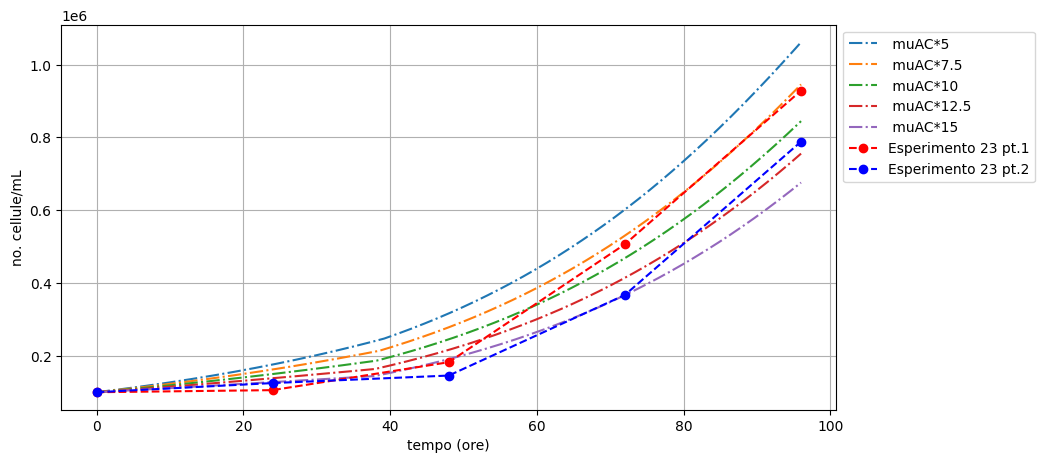

In [33]:
c = [0.073491512, 4e6, 3.7e-8, 0.002438, 0.4423, 0.017]
#     r            K    muA         a     muC     d
#     0            1     2          3      4      5
muAC = 0.0013 #preso da dose letteratura
muCA = 0.013 
dose = 1.9e-3

pmuAC = [5, 7.5, 10, 12.5, 15]
# declare a time vector (time window)
t = np.linspace(0, 96, 1000)
# experimental values
t_exp = [0, 24, 48, 72, 96]
val_exp23 = [100000, 105733, 182507, 506520, 928453]
val_exp2 =  [100000, 125167, 145787, 367200, 788333]

x0 = [100000, 4362, dose*6e14]
color = ['bo--', 'ro--', 'g:']

c[0] = 0.43*0.073491512

for i in range(len(pmuAC)):
    muAC = 0.0013*pmuAC[i]
    muCA = muAC*10
    sol = solve_ivp(lambda t, x: f_gem(t, x), 
                [t[0], t[-1]], x0, method = "BDF", t_eval = t,
                rtol = 3e-14)
    # plot the results
    lb = ' muAC*'+str(pmuAC[i])
    plt.plot(sol.t, sol.y[0], '-.', label = lb)
plt.plot(t_exp, val_exp23, color[1], label = 'Esperimento 23 pt.1')
plt.plot(t_exp, val_exp2, color[0], label = 'Esperimento 23 pt.2')
plt.xlabel("tempo (ore)")
plt.ylabel("no. cellule/mL")

plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.show()

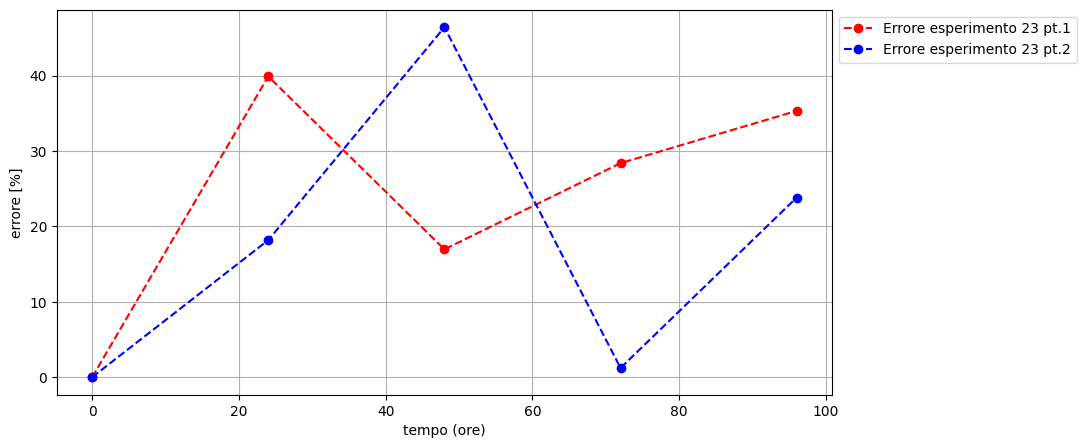

e_max =  46.42163434095164
e_min =  1.2249834591813598
e_med23 =  24.11732772329551
e_med2 =  17.932320295774055
muAC =  0.00975


In [34]:
# ERRORE %
c = [0.073491512, 4e6, 3.7e-8, 0.002438, 0.4423, 0.017]
#     r            K    muA         a     muC     d
#     0            1     2          3      4      5
c[0] = 0.43*0.073491512
muAC = 0.0013*7.5
muCA = muAC*10
error23 = []
error2 = []
t = np.linspace(0, 96, 1000)

sol = solve_ivp(lambda t, x: f_gem(t, x), 
                [t[0], t[-1]], x0, method = "BDF", t_eval = t,
                rtol = 3e-14)

for i in range(len(t_exp)):
    error23.append((np.absolute(sol.y[0][i*200] - val_exp23[i])/val_exp23[i])*100)
    error2.append((np.absolute(sol.y[0][i*200] - val_exp2[i])/val_exp2[i])*100)

plt.plot(t_exp, error23, color[1], label = 'Errore esperimento 23 pt.1')
plt.plot(t_exp, error2, color[0], label = 'Errore esperimento 23 pt.2')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.xlabel("tempo (ore)")
plt.ylabel("errore [%]")
plt.show()
print("e_max = ",np.max(error2))
print("e_min = ",error2[3])
print("e_med23 = ",np.average(error23))
print("e_med2 = ",np.average(error2))
print("muAC = ",muAC)

### 2.4 0.3ng/ml

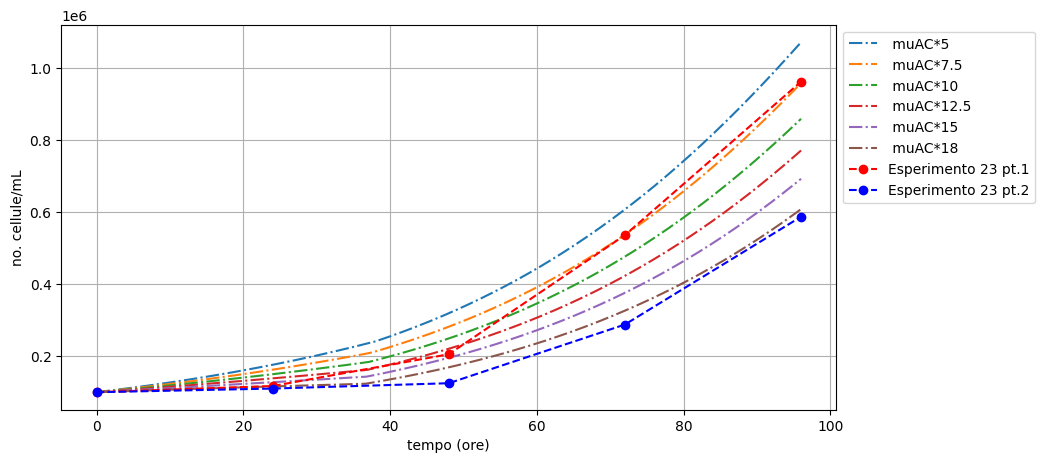

In [36]:
c = [0.073491512, 4e6, 3.7e-8, 0.002438, 0.4423, 0.017]
#     r            K    muA         a     muC     d
#     0            1     2          3      4      5
muAC = 0.0013 #preso da dose letteratura
muCA = 0.013 
dose = 1.14e-3

pmuAC = [5, 7.5, 10, 12.5, 15, 18]
# declare a time vector (time window)
t = np.linspace(0, 96, 1000000)
# experimental values
t_exp = [0, 24, 48, 72, 96]
val_exp23 = [100000, 117167, 205260, 535500, 961000]
val_exp2 =  [100000, 110147, 124960, 287640, 586520]

x0 = [100000, 4362, dose*6e14]
color = ['bo--', 'ro--', 'g:']

c[0] = 0.43*0.073491512

for i in range(len(pmuAC)):
    muAC = 0.0013*pmuAC[i]
    muCA = muAC*10
    sol = solve_ivp(lambda t, x: f_gem(t, x), 
                [t[0], t[-1]], x0, method = "BDF", t_eval = t,
                rtol = 3e-14)
    # plot the results
    lb = ' muAC*'+str(pmuAC[i])
    plt.plot(sol.t, sol.y[0], '-.', label = lb)
plt.plot(t_exp, val_exp23, color[1], label = 'Esperimento 23 pt.1')
plt.plot(t_exp, val_exp2, color[0], label = 'Esperimento 23 pt.2')
plt.xlabel("tempo (ore)")
plt.ylabel("no. cellule/mL")
    
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.show()

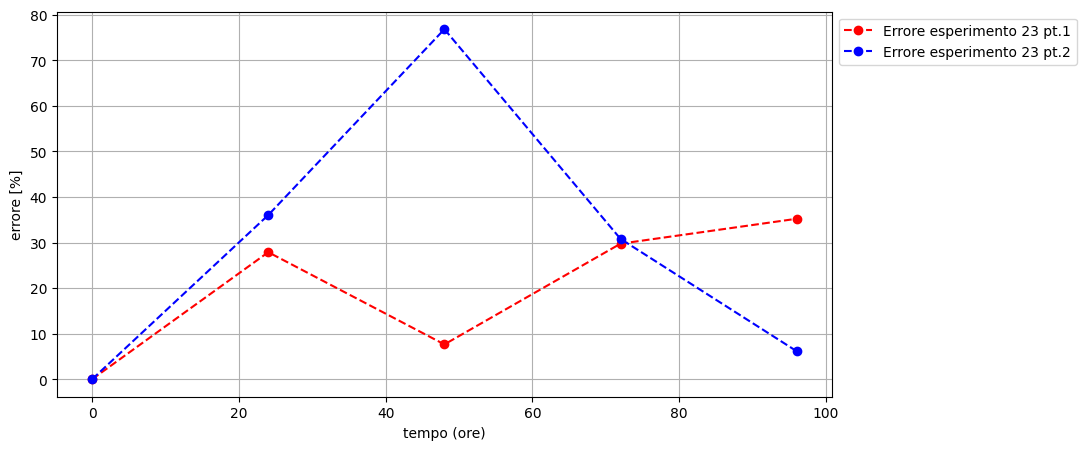

e_max =  76.80946749114241
e_min =  7.639632942088845
e_med23 =  20.095323697435884
e_med2 =  29.955222306120056
muAC =  0.0091


In [37]:
# ERRORE %
c = [0.073491512, 4e6, 3.7e-8, 0.002438, 0.4423, 0.017]
#     r            K    muA         a     muC     d
#     0            1     2          3      4      5
c[0] = 0.43*0.073491512
muAC = 0.0013*7
muCA = muAC*10
error23 = []
error2 = []
t = np.linspace(0, 96, 1000)

sol = solve_ivp(lambda t, x: f_gem(t, x), 
                [t[0], t[-1]], x0, method = "BDF", t_eval = t,
                rtol = 3e-14)

for i in range(len(t_exp)):
    error23.append((np.absolute(sol.y[0][i*200] - val_exp23[i])/val_exp23[i])*100)
    error2.append((np.absolute(sol.y[0][i*200] - val_exp2[i])/val_exp2[i])*100)

plt.plot(t_exp, error23, color[1], label = 'Errore esperimento 23 pt.1')
plt.plot(t_exp, error2, color[0], label = 'Errore esperimento 23 pt.2')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    
plt.grid()
plt.xlabel("tempo (ore)")
plt.ylabel("errore [%]")
plt.show()
print("e_max = ",np.max(error2))
print("e_min = ",error23[2])
print("e_med23 = ",np.average(error23))
print("e_med2 = ",np.average(error2))
print("muAC = ",muAC)